In [2]:
points = [326.6913799009275,151.09612141652613,216.607062868887,185.63237774030353,182.0708065451096,262.25969645868463,174.5160004742833,304.35075885328837,211.2107728182968,400.40472175379426,272.72847939502526,443.575042158516,310.5025097491568,416.5935919055649,374.1787323461214,361.5514333895447,404.39795662942663,311.9055649241146,417.34905275084316,264.41821247892074,408.7149886698988,221.24789207419897,374.1787323461214,179.15682967959526]

In [18]:
import numpy as np

import matplotlib.pyplot as plt

In [4]:

coordinates = np.array(points, dtype=np.int32).reshape(-1, 2)

In [5]:
print(coordinates)

[[326 151]
 [216 185]
 [182 262]
 [174 304]
 [211 400]
 [272 443]
 [310 416]
 [374 361]
 [404 311]
 [417 264]
 [408 221]
 [374 179]]


In [6]:
import cv2

image = cv2.imread("./data/mint_leaves/home_pepper_mint/home_peppermint_4.jpg")

image = cv2.resize(image, (640, 640))

cv2.imwrite("./data/mint_leaves/home_pepper_mint/home_peppermint_4.jpg", image)



True

In [7]:
mask = np.zeros(image.shape[:2], dtype=np.uint8)

In [8]:


cv2.fillPoly(mask, [coordinates], 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
polygon = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow("segmented", polygon)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
from sklearn.cluster import KMeans

In [11]:
polygon_2 = cv2.resize(polygon, (224, 224))

pixels = polygon_2.reshape(-1, 3)

k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)

labels = kmeans.fit_predict(pixels)

centers = kmeans.cluster_centers_.astype("uint8")



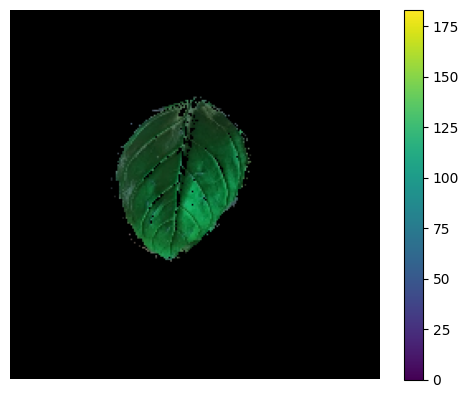

In [21]:
labels_2d = labels.reshape(polygon_2.shape[:2])

mask = (labels_2d == 1).astype(np.uint8)

masked_image = cv2.bitwise_and(polygon_2, polygon_2, mask=mask)

# plt.imshow(mask, cmap='jet')  # or use 'viridis', 'nipy_spectral', etc.
plt.imshow(masked_image)
# plt.title('2D Cluster Labels')
plt.axis('off')
plt.colorbar()  # optional, shows the cluster values
plt.show()
